In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


import bokeh as bk
from bokeh.plotting import figure, show # Es para visualizar informacion interactiva 


In [23]:
#importacion de DataFrames

tipo_contrtato = "https://raw.githubusercontent.com/Ipaulenas/CoderHouse/main/Telco_customer_churn_services.csv"
df1 = pd.read_csv (tipo_contrtato)      # Detalles de los contratos de los clientes

estado_del_servicio = "https://raw.githubusercontent.com/Ipaulenas/CoderHouse/main/Telco_customer_churn_status.csv"
df2 = pd.read_csv (estado_del_servicio) # Estado del servicio de los clientes

datos_clientes = "https://raw.githubusercontent.com/Ipaulenas/CoderHouse/main/Telco_customer_churn_demographics.csv"
df3 = pd.read_csv (datos_clientes)      # Informacion detallada de los clientes


Hipotesis:
En el siguiente grafico (que se realizo en el Desafio n°2) se pueden observar que la causa principal del motivo de la baja del servicio esta relacionada en su gran mayoria con respacto al servicio que ofrencen en las compentencias.
Por esta razon mas a encontrar la causas principales de la baja del servicio con un poco mas de detalles. 

In [24]:
# Uno los dos DataFrame df1 y df2 en función de la columna “Customer ID”
df_comb_1_2 = pd.merge(df2, df1, on='Customer ID')

# Uno los dos DataFrame df_comb_1_2  y df3 en función de la columna “Customer ID”
df_final = pd.merge(df_comb_1_2, df3, on='Customer ID')
# Imprimimos el data set final
df_final.head


<bound method NDFrame.head of      Customer ID  Count_x Quarter_x Customer Status Churn Label  Churn Value  \
0     8779-QRDMV        1        Q3         Churned         Yes            1   
1     7495-OOKFY        1        Q3         Churned         Yes            1   
2     1658-BYGOY        1        Q3         Churned         Yes            1   
3     4598-XLKNJ        1        Q3         Churned         Yes            1   
4     4846-WHAFZ        1        Q3         Churned         Yes            1   
...          ...      ...       ...             ...         ...          ...   
7038  2569-WGERO        1        Q3          Stayed          No            0   
7039  6840-RESVB        1        Q3          Stayed          No            0   
7040  2234-XADUH        1        Q3          Stayed          No            0   
7041  4801-JZAZL        1        Q3          Stayed          No            0   
7042  3186-AJIEK        1        Q3          Stayed          No            0   

       Ch

Month-to-Month    3610
Two Year          1883
One Year          1550
Name: Contract, dtype: int64


Text(0, 0.5, '% de clientes')

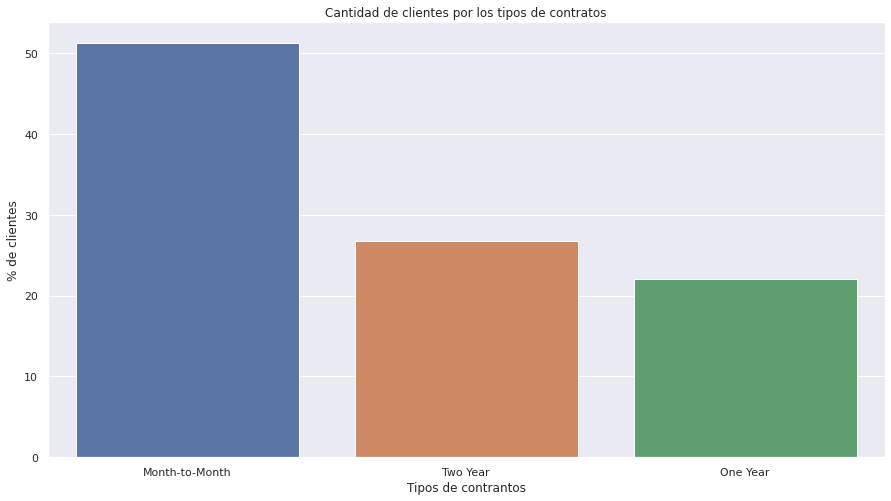

In [118]:
#Calculo la cantiadad de clientes por tipos de contrato
y = df_final['Contract'].value_counts()
print (y)

# Total de los clientes

total_clientes = len(df_final.index)
#print (total_clientes)

# Paso ese valor a % para poder graficarlo

y_porcentaje = (df_final['Contract'].value_counts() * 100 ) / total_clientes
#print(y_porcentaje)

# Grafico de barras con Seaborn
g = sns.barplot(data = df_final, x = y_porcentaje.index, y =  y_porcentaje)  
g.set_title("Cantidad de clientes por los tipos de contratos")
g.set_xlabel('Tipos de contrantos')
g.set_ylabel('% de clientes')


#Inteto de grafico con Bokeh
#import bokeh as bk
#from bokeh.plotting import figure, show
#p = figure( title="Cantidad de clientes por los tipos de contratos", x_axis_label='Tipos de contrantos', y_axis_label='% de clientes',)
#p.vbar(x= y_porcentaje.index ,top=y_porcentaje)
#show(p)





Month-to-Month    1655
One Year           166
Two Year            48
Name: Contract, dtype: int64
Churned    1869
Name: Customer Status, dtype: int64
Month-to-Month    88.550027
One Year           8.881755
Two Year           2.568218
Name: Contract, dtype: float64


Text(0, 0.5, '% de clientes')

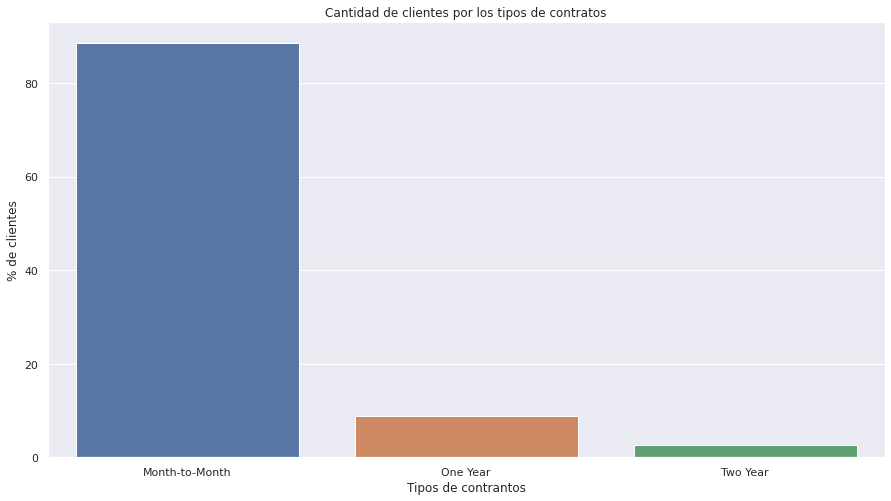

In [150]:
from bokeh.models.markers import Y


#Calculo la cantiadad de clientes por tipos de contrato
y = df_final['Contract']
#print (y)

# Total de los clientes
y =  y.loc[df_final['Customer Status'] == "Churned"].value_counts ()



print (y)




total_clientes = df_final['Customer Status'].loc[df_final['Customer Status'] == "Churned"].value_counts ()
print (total_clientes)
# Paso ese valor a % para poder graficarlo

# No pude dividir con total_clientes porque me da como resultado NaN, no logre resolverlo

#y_porcentaje = (y * 100 ) / total_clientes 


y_porcentaje = (y * 100 ) / 1869
print(y_porcentaje)



# Grafico de barras con Seaborn
g = sns.barplot(data = df_final, x = y_porcentaje.index, y =  y_porcentaje)  
g.set_title("Cantidad de clientes por los tipos de contratos que solicitaron la baja del servicio")
g.set_xlabel('Tipos de contrantos')
g.set_ylabel('% de clientes')



Encontramos una relacion con los clientes que se dieron de baja y el tipo de contrato que habian contratado ya que el 88% de los clientes que pidieron la baja habian contrando el contrato de Mes a Mes.

Stayed     67.016896
Churned    26.536987
Joined      6.446117
Name: Customer Status, dtype: float64


Text(0, 0.5, 'Cantidad de clientes')

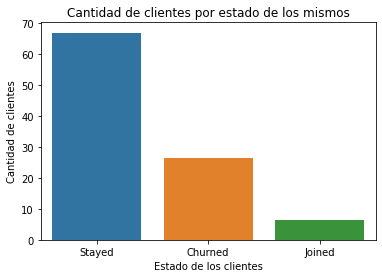

In [46]:
cant = df_final['Customer Status'].value_counts()
#print (cant)
total_clientes = len(df_final.index)
#print (total_clientes)
# Paso ese valor a % para poder graficarlo
cant_p = (cant * 100 ) / total_clientes
print (cant_p)
g = sns.barplot(data = df_final, x = cant_p.index, y =  cant_p  ) 
g.set_title("Cantidad de clientes por estado de los mismos")
g.set_xlabel('Estado de los clientes')
g.set_ylabel('Cantidad de clientes')

Se puede observar que el 26% de los clientes estan descontrantado el servicio, a partir de esto se debe encontrar la causa de dicho problema. 

Competitor         11.940934
Attitude            4.458327
Dissatisfaction     4.302144
Price               2.995882
Other               2.839699
Name: Churn Category, dtype: float64


Text(0, 0.5, 'Cantidad de clientes')

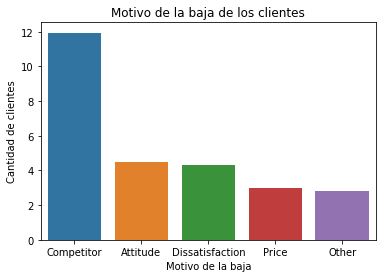

In [47]:
cant = df_final['Churn Category'].value_counts()
total_clientes = len(df_final.index)
#print (total_clientes)
# Paso ese valor a % para poder graficarlo
cant_p = (cant * 100 ) / total_clientes
print (cant_p)

#print (cant)
g = sns.barplot(data = df_final, x = cant_p.index, y =  cant_p)  
g.set_title("Motivo de la baja de los clientes")
g.set_xlabel('Motivo de la baja')
g.set_ylabel('Cantidad de clientes')

Text(12.334999999999994, 0.5, 'Cantidad de clientes')

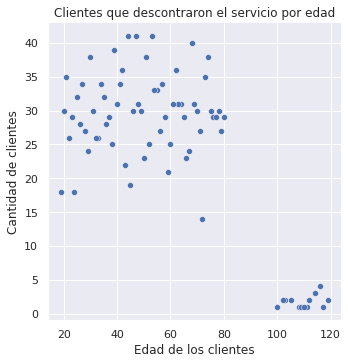

In [113]:
cant = df_final['Age']
cant = cant.loc[df_final['Customer Status'] == "Churned"].value_counts ()
#print (cant)

#cant2 = df_final['Age'].value_counts ()
#cant2 = cant.value_counts ()
#print (df_final['Age'].value_counts ())


g = sns.relplot(data = cant, x = cant.index ,  y = cant  )

plt.title("Clientes que descontraron el servicio por edad")
plt.xlabel('Edad de los clientes')
plt.ylabel('Cantidad de clientes')




Competitor had better devices                4.444129
Competitor made better offer                 4.415732
Attitude of support person                   3.123669
Don't know                                   1.845804
Competitor offered more data                 1.661224
Competitor offered higher download speeds    1.419849
Attitude of service provider                 1.334659
Price too high                               1.107483
Product dissatisfaction                      1.093284
Network reliability                          1.022292
Long distance charges                        0.908704
Service dissatisfaction                      0.894505
Moved                                        0.653131
Extra data charges                           0.553741
Limited range of services                    0.525344
Poor expertise of online support             0.440153
Lack of affordable download/upload speed     0.425955
Lack of self-service on Website              0.411756
Poor expertise of phone supp

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Competitor had better devices'),
  Text(1, 0, 'Competitor made better offer'),
  Text(2, 0, 'Attitude of support person'),
  Text(3, 0, "Don't know"),
  Text(4, 0, 'Competitor offered more data'),
  Text(5, 0, 'Competitor offered higher download speeds'),
  Text(6, 0, 'Attitude of service provider'),
  Text(7, 0, 'Price too high'),
  Text(8, 0, 'Product dissatisfaction'),
  Text(9, 0, 'Network reliability'),
  Text(10, 0, 'Long distance charges'),
  Text(11, 0, 'Service dissatisfaction'),
  Text(12, 0, 'Moved'),
  Text(13, 0, 'Extra data charges'),
  Text(14, 0, 'Limited range of services'),
  Text(15, 0, 'Poor expertise of online support'),
  Text(16, 0, 'Lack of affordable download/upload speed'),
  Text(17, 0, 'Lack of self-service on Website'),
  Text(18, 0, 'Poor expertise of phone support'),
  Text(19, 0, 'Deceased')])

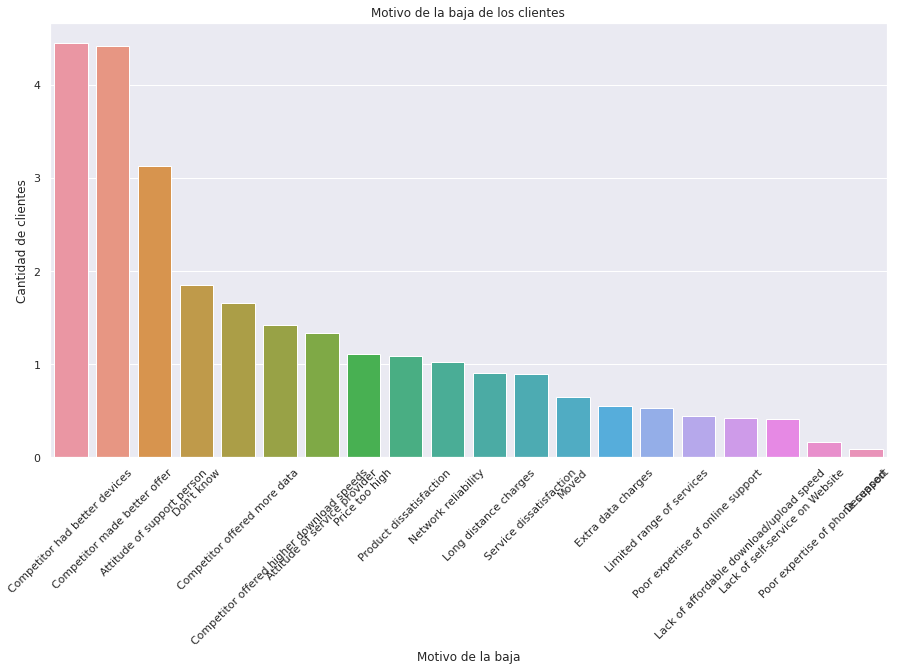

In [59]:
cant = df_final['Churn Reason'].value_counts()
total_clientes = len(df_final.index)
#print (total_clientes)
# Paso ese valor a % para poder graficarlo
cant_p = (cant * 100 ) / total_clientes
print (cant_p)

#print (cant)


plt.figure(figsize = (15,8))

g = sns.barplot(data = df_final, x = cant_p.index, y =  cant_p  )

g.set_title("Motivo de la baja de los clientes")
g.set_xlabel('Motivo de la baja')
g.set_ylabel('Cantidad de clientes')

plt.xticks(rotation=45)

A partir de este grafico podemos verificar que las principales causas de que los clientes soliciten la baja estan realacionadas con las ofertas (4% de la bajas) y los dispositvos que ofrecen la copentencia (4% de la bajas).